In [7]:
#libraries
import tensorflow as tf
from tensorflow import keras
import pickle


#constructing the neural network

## creating a model object
model=tf.keras.Sequential()

#convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu",input_shape=(128,128,3)))

model.add(tf.keras.layers.MaxPooling2D(2,2))
## More layer

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))

model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),strides=(1,1),padding="same",activation="relu"))

#Flatten the convolution layer
model.add(tf.keras.layers.Flatten())

#dense layer and dropout layer

model.add(tf.keras.layers.Dense(64,activation="relu"))

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(64,activation="relu"))

model.add(tf.keras.layers.Dropout(0.5))

#output layer
model.add(tf.keras.layers.Dense(10,activation="softmax")) #use softmax for multiclass classification

#compiling the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"]   )

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 65536)            

In [8]:
#reading files from drive
path="/content/drive/MyDrive/dataset/"
pickle_in0=open(path+"X_train.pickle","rb")
X_train=pickle.load(pickle_in0)

pickle_in1=open(path+"X_test.pickle","rb")
X_test=pickle.load(pickle_in1)

pickle_in2=open(path+"X_val.pickle","rb")
X_val=pickle.load(pickle_in2)

pickle_in3=open(path+"y_test.pickle","rb")
y_test=pickle.load(pickle_in3)


pickle_in4=open(path+"y_train.pickle","rb")
y_train=pickle.load(pickle_in4)

pickle_in5=open(path+"y_val.pickle","rb")
y_val=pickle.load(pickle_in5)


In [9]:
#Training the model for 50 epochs
results=model.fit(X_train,y_train,batch_size=128,epochs=50,validation_data=(X_val,y_val))

Epoch 1/50
56/56 [==============================] - 17s 81ms/step - loss: 2.2032 - accuracy: 0.1695 - val_loss: 1.9876 - val_accuracy: 0.3346
Epoch 2/50
56/56 [==============================] - 4s 66ms/step - loss: 1.9869 - accuracy: 0.2599 - val_loss: 1.6451 - val_accuracy: 0.4466
Epoch 3/50
56/56 [==============================] - 4s 69ms/step - loss: 1.7409 - accuracy: 0.3580 - val_loss: 1.3376 - val_accuracy: 0.5458
Epoch 4/50
56/56 [==============================] - 4s 66ms/step - loss: 1.5902 - accuracy: 0.4095 - val_loss: 1.1781 - val_accuracy: 0.6196
Epoch 5/50
56/56 [==============================] - 4s 67ms/step - loss: 1.3989 - accuracy: 0.4894 - val_loss: 1.0111 - val_accuracy: 0.6845
Epoch 6/50
56/56 [==============================] - 4s 67ms/step - loss: 1.2399 - accuracy: 0.5365 - val_loss: 0.8841 - val_accuracy: 0.7074
Epoch 7/50
56/56 [==============================] - 4s 66ms/step - loss: 1.1364 - accuracy: 0.5758 - val_loss: 0.8362 - val_accuracy: 0.7354
Epoch 8/50
5

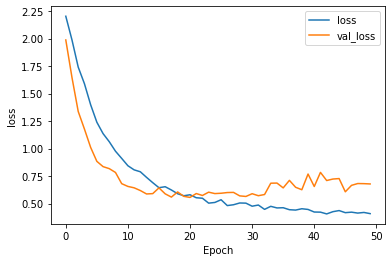

In [10]:
#Visualizing the results

#training loss
import matplotlib.pyplot as plt
plt.plot(results.history["loss"],label="loss")
#validation loss
plt.plot(results.history["val_loss"],label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

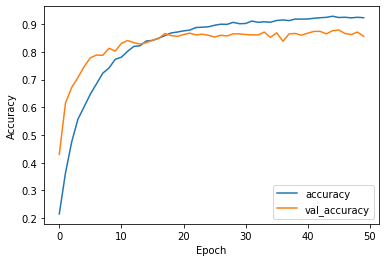

In [11]:
#training accuracy
import matplotlib.pyplot as plt
plt.plot(results.history["accuracy"],label="accuracy")
#validation accuracy
plt.plot(results.history["val_accuracy"],label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
#Evaluate
score=model.evaluate(X_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

28/28 [==============================] - 0s 11ms/step - loss: 0.7032 - accuracy: 0.8730
Test loss: 0.7031794190406799
Test accuracy: 0.8729977011680603


In [13]:
model.save("trained_model_urban_sounds_classification")

In [14]:
#loading the saved model
new_model = tf.keras.models.load_model('/content/trained_model_urban_sounds_classification')

# Check its architecture
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 65536)            